# HW4. Relational Algebra & Query Plans

## Objectives

In this homework assignment, you will review your knowledge in two different topics:

 - Relational Algebra
 - Query Processing & Optimization

This assignment has two sections, and a total of 20 points. 

### Preparation 

To write a relational algebra query in a cell, the cell should be a [Markdown cell](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). You can use [LaTeX equations](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#LaTeX-equations) in a markdown cell for required algebraic notation. Here is a list of the main operators:

* Selection ($\sigma$)
* Projection ($\pi$)
* Union ($\cup$)
* Intersect ($\cap$)
* Set Difference ($-$) 
* Cross Product ($\times$)
* Rename ($\rho$)
* Join ($\bowtie$)
* Conjunction ($\wedge$)
* Disconjunction ($\vee$)
* Greater Than or Equal To ($\geq$)
* Less Than or Equal To ($\leq$)

You may also need $_{Subscript}$ and $^{Superscript}$ in the notations you use.

Consider the same bank database you have used in homework assignments 2 and 3.
 - Customer = {<span style="text-decoration:underline">customerID</span>, firstName, lastName, income, birthDate}
 - Account = {<span style="text-decoration:underline">accNumber</span>, type, balance, branchNumber<sup>FK-Branch</sup>}
 - Owns = {<span style="text-decoration:underline">customerID</span><sup>FK-Customer</sup>, <span style="text-decoration:underline">accNumber</span><sup>FK-Account</sup>}
 - Transactions = {<span style="text-decoration:underline">transNumber</span>, <span style="text-decoration:underline">accNumber</span><sup>FK-Account</sup>, amount}
 - Employee = {<span style="text-decoration:underline">sin</span>, firstName, lastName, salary, branchNumber<sup>FK-Branch</sup>}
 - Branch = {<span style="text-decoration:underline">branchNumber</span>, branchName, managerSIN<sup>FK-Employee</sup>, budget}
 

## Q1: Relational Algebra (5 points)


In this assignment, we want you to write down the relational algebraic presentations for the queries you have previously written to extract data from the bank database.

1.1. Find out names of the bank branches and first name and last name of their managers.

$\pi_{Branch.branchName, Employee.firstName, Employee.lastName}( Employee \bowtie_{Employee.sin=Branch.managerSIN} Branch)$

1.2. Show account number, account type, account balance, and transaction amount of the accounts with balance higher than 100,000 and transaction amounts higher than 15000.

$\pi_{Account.accNumber, Account.type, Account.balance, Transactions.amount}(\sigma_{Account.balance > 100000 \wedge Transactions.amount > 15000} ( Account \bowtie Transactions ))$

1.3. Show first name, last name, and income of customers whose income is at least twice the income of any customer whose lastName is Butler. 

$\pi_{c1.firstName,c1.lastName,c1.Income}(\pi_c.customerId,c.income(\sigma_{c2.lastname = 'Butler' \wedge c1.Income \geq c2.Income*2}(\rho_{c1}(Customer) \times \rho_{c2} (Customer)))▷(\rho_{c1})(Customer))$

1.4. Show Customer ID, income, account numbers and branch numbers of customers with income greater than 90,000 who own an account at both London and Latveria branches.

$\pi_{c.customerID, c.income, a.accNumber, b.branchNumber}(\sigma_{c.Income > 900000}((\pi_{c.customerID,c.income}(\sigma_{b.branchName = 'London'\wedge o.customerID = c.customerID}(\rho_{o}(Owns) \bowtie \rho_{a}(Account)\bowtie \rho_{b}(Branch)\bowtie \rho_{c}(customer))) \bowtie (\rho_{o}(Owns) \bowtie \rho_{a}(Account) \bowtie \rho_{b}(Branch) \bowtie \rho_{c}(customer))))\wedge  (\pi_{c.customer,c.income}(\sigma_{c2.branchName = 'Latveria'\wedge o.customerID = c.customerID}(\rho_{o}(Owns) \bowtie \rho_{a}(Account) \bowtie \rho_{b}(Branch)\bowtie \rho_{c}(customer))))\bowtie(\rho_{o}(Owns) \bowtie \rho_{a}(Account) \bowtie \rho_{b}(Branch)\bowtie \rho_{c}(customer)))))$

1.5. Customer ID of customers who have an account at the New York branch, who do not own an account at the London branch and who do not co-own an account with another customer who owns an account at the London branch.

**(▷) is the symbol for Anti-join**

$\pi_{o.customerID}(\sigma_{b.branchName = 'New York'}(\pi_{o1.customerID}(\sigma_{o.customerID , o1.customerID}(\pi_{o2.customerID}(\sigma_{b.branchName = 'London' \wedge o2.customerID = o3.customerID}(\rho_{o2}(Owns) \times \rho_{o3}(Owns) \bowtie \rho_{a}(Account) \bowtie \rho_{b}(Branch))) \bowtie (\rho_{o2}(Owns) \times \rho_{o1}(Owns)))) ▷ (\rho_{o}(Owns))))$


## Q2: Query Processing (15 points)

In this assignment, we want to go through the query processing steps for a query you have previously written.

2.1. (5 points). You have previously provided the SQL query to find out customer ID, first name, last name and income of customers who have income greater than $5000 and own accounts in all of the branches that Helen Morgan owns accounts in. Parse your query into a query parse tree.

<img src="ParseTree.png" alt="Parse Tree" style="width: 450px;"/> 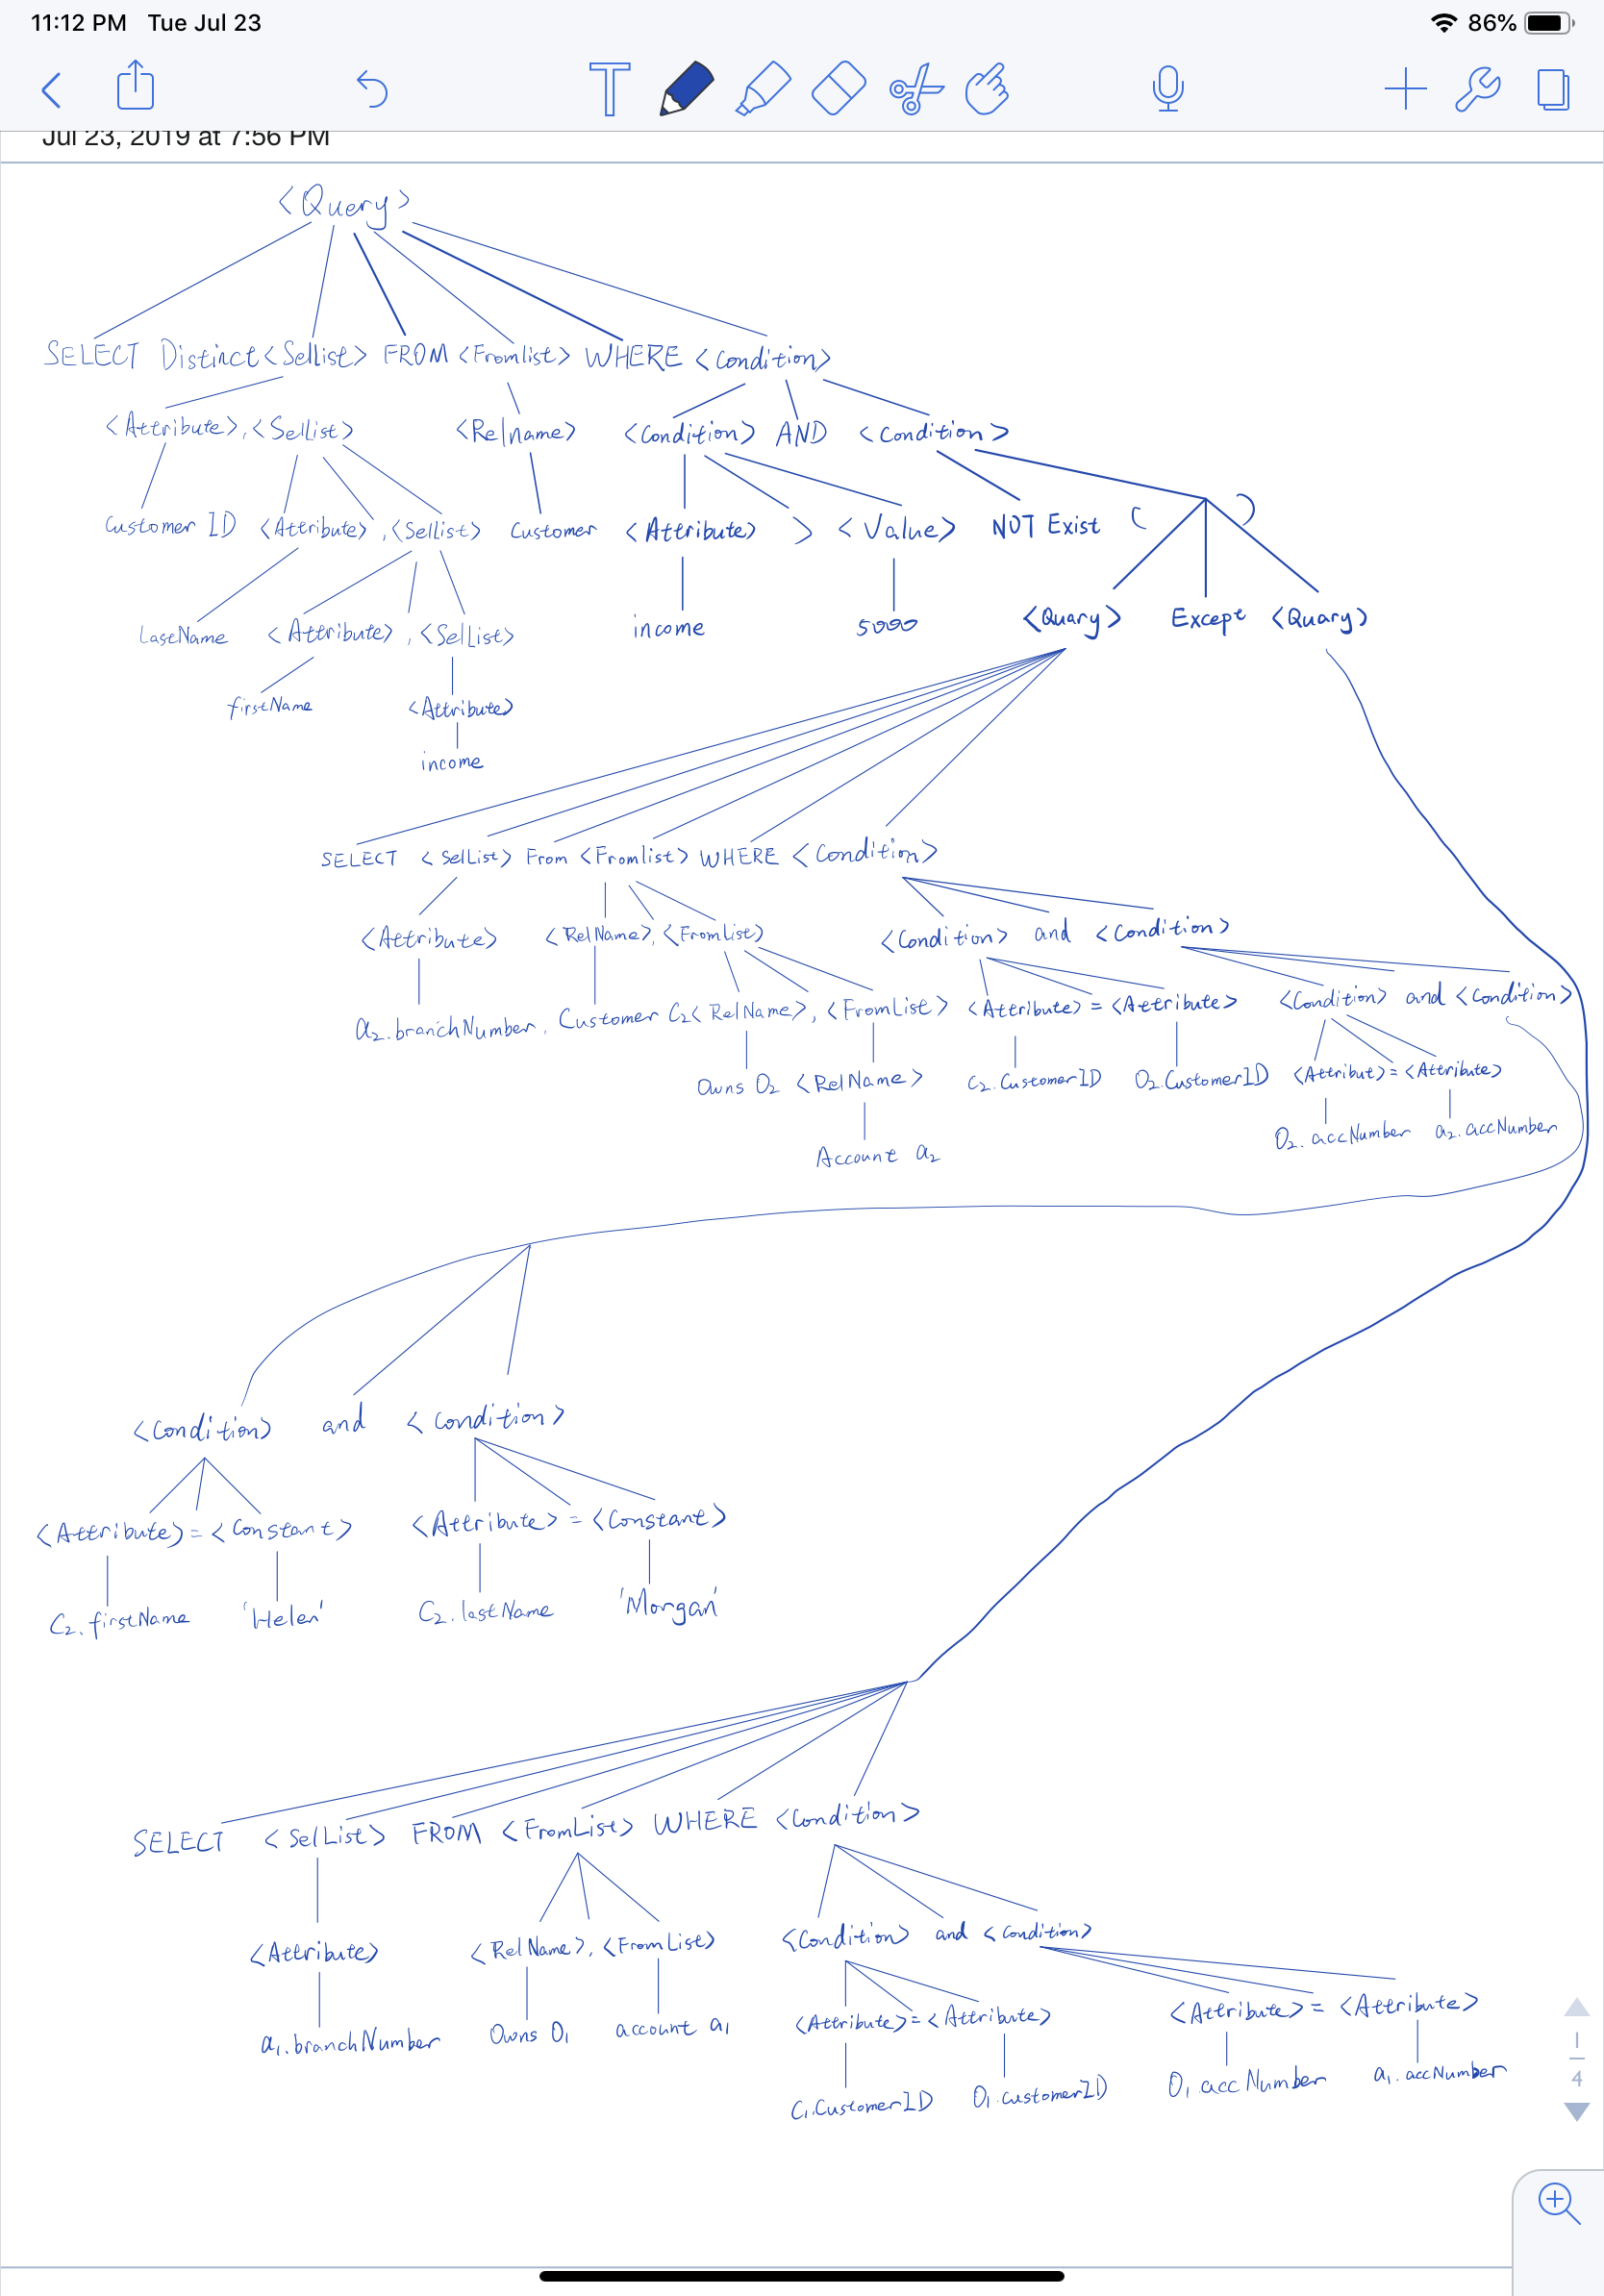

2.2. (5 points). Convert your parse tree to the equivalent relational algebraic representation.

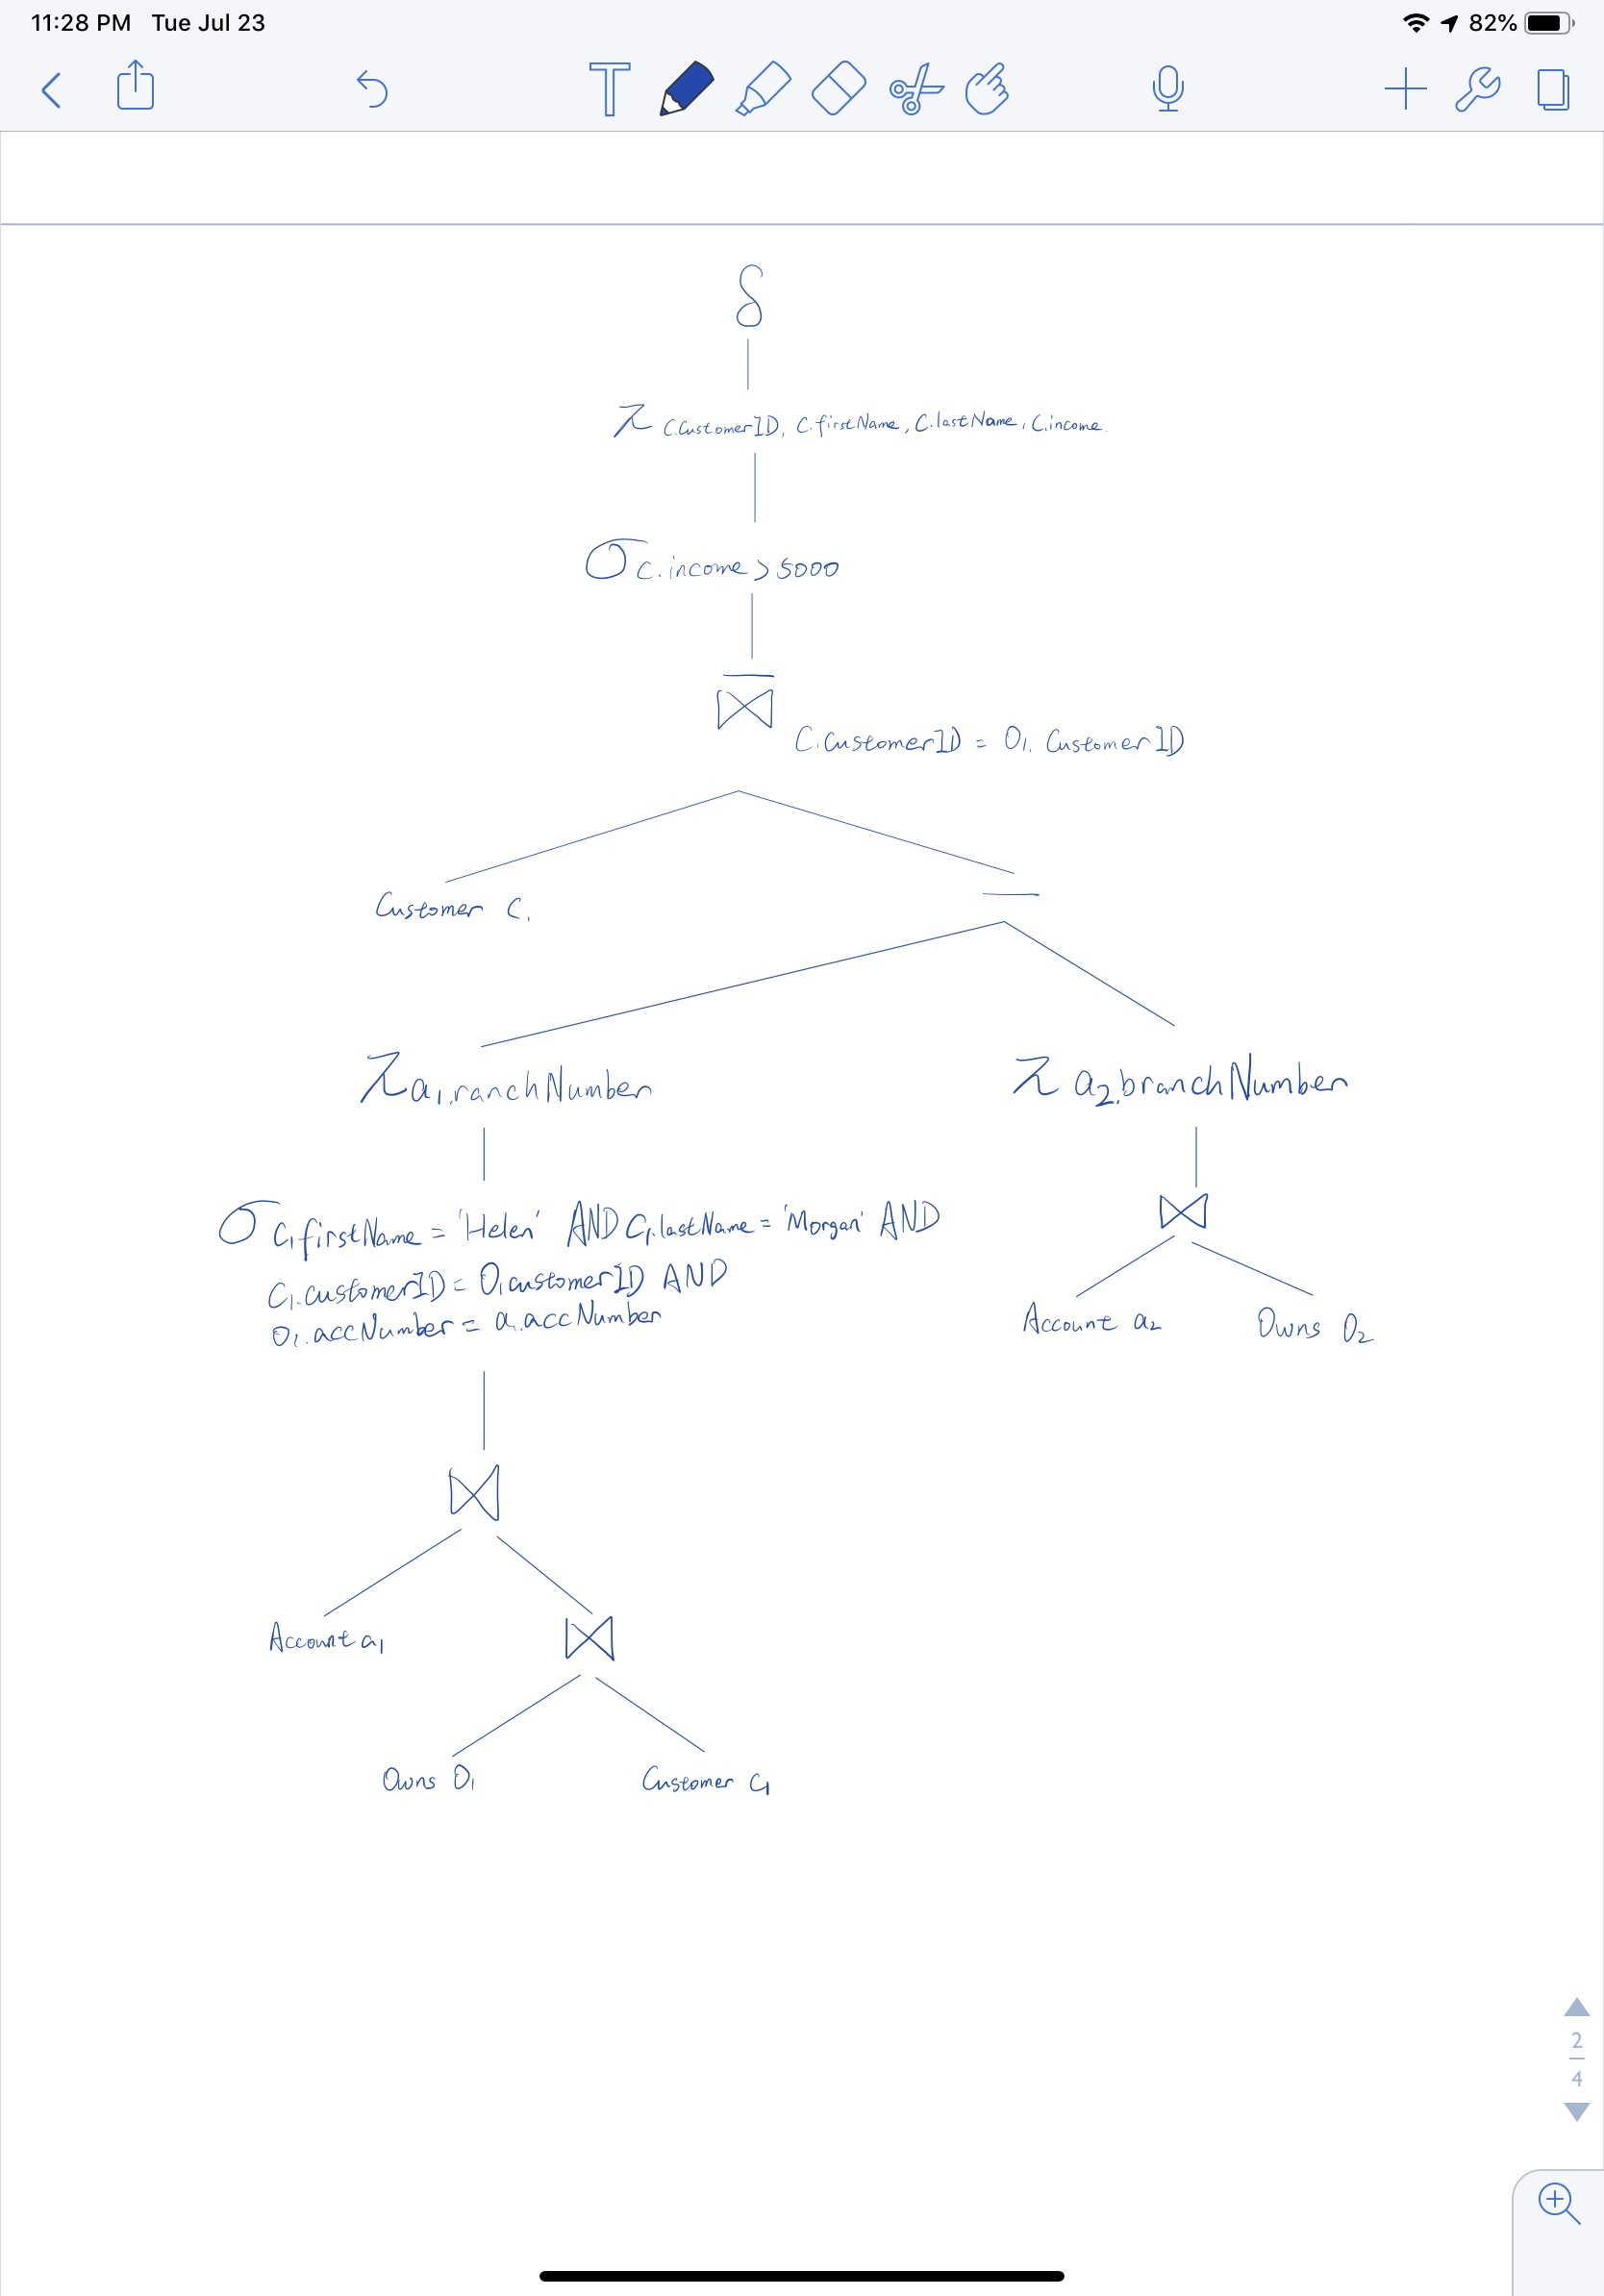<img src="qp1.png" alt="RA" style="width: 450px;"/> 

2.3. (3 points) Can you rewrite your query plan? 

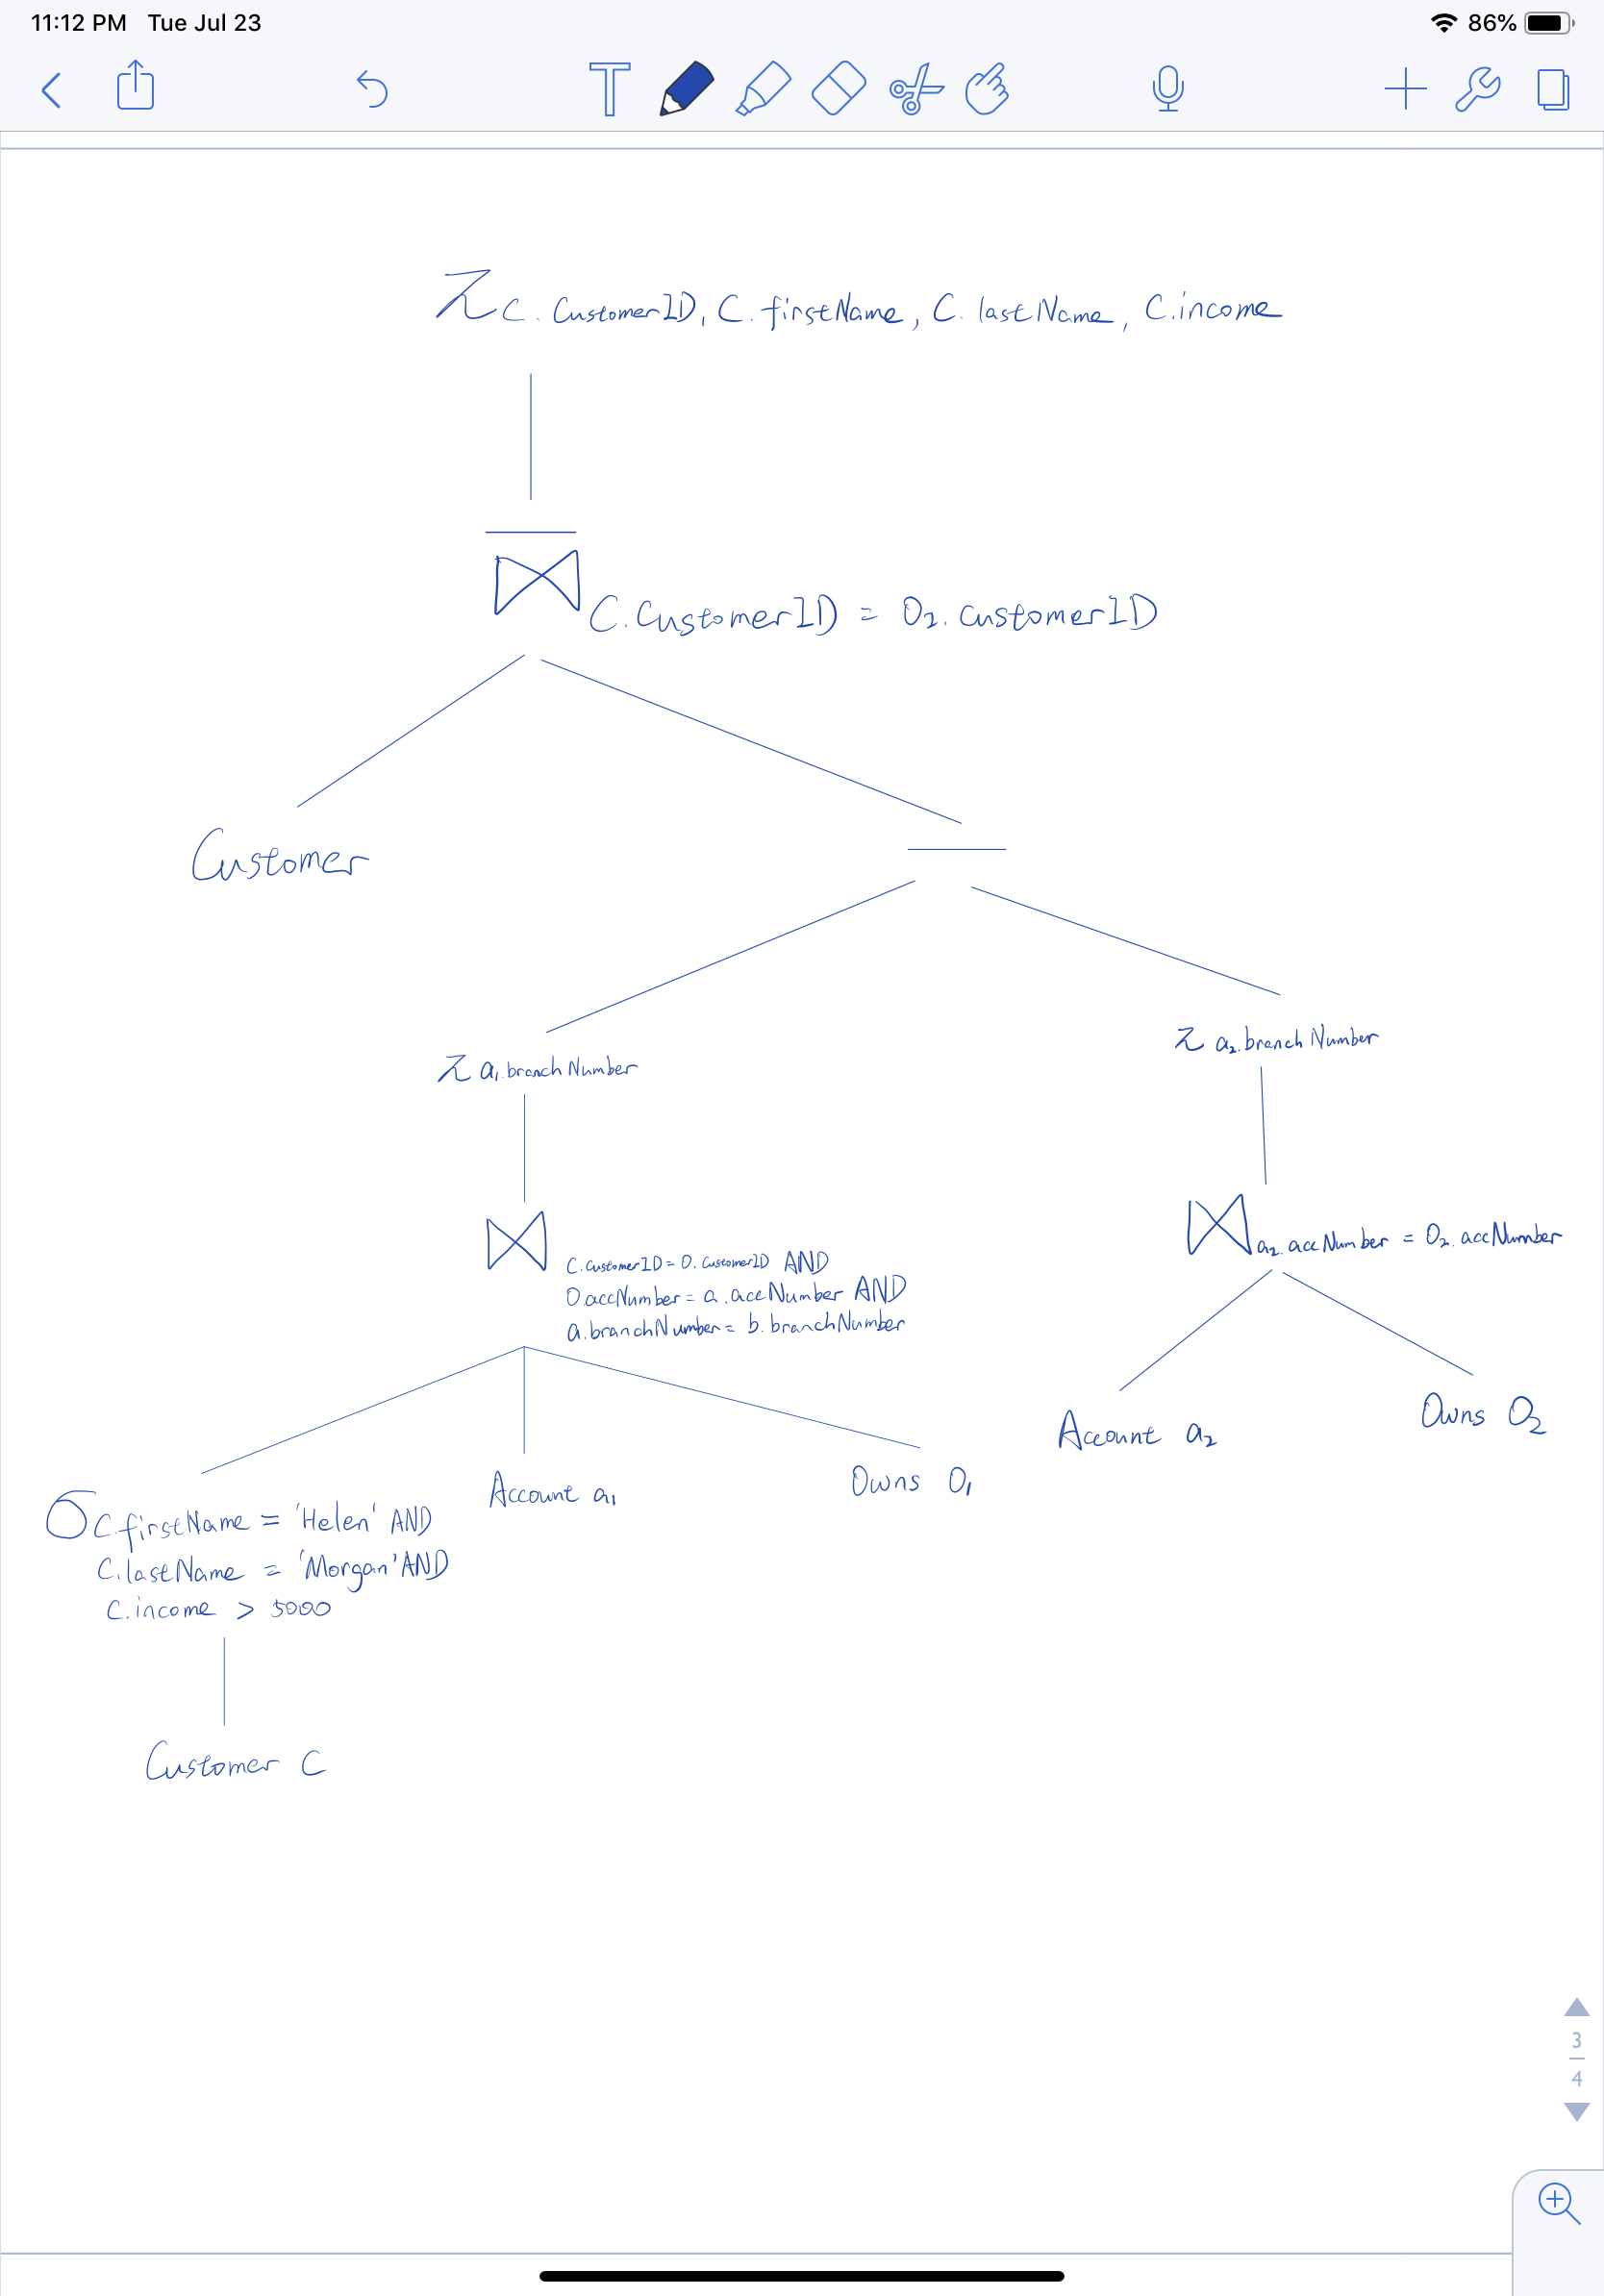<img src="qp2.png" alt="Query Plan" style="width: 450px;"/> 

**Explanations:**<br>
1. By Removing "duplicated elimination" symbol, our final answer will not have any effect by this change.<br>
2. If we move "income > 5000", "c.firstName = 'Helen'" and "c.lastName = 'Morgan'" down to one of the subquery, we will have the same result and improve effienciy.<br>
3. Grouping the associative/commutative operators together.

2.4. (2 points) Assume you have a million records in each of the six tables above. If you need, make necessary assumptions about your storage blocks, as well as about charactristics in the bank.db. Can you enumerate the size and cost of the intermediate tables in your query plan?

Suppose we have: 
1. 2000 people with firstname 'Helen'
2. 2000 people with lastname 'Morgan'
3. 1/100 people with income > 5000<br>

Hence, for each table: <br>
1. R(a,b) has T(R) = 1,000,000 records
2. V(R,a) = 2,000. 1,000,000/2,000 = 500, which means that there are 1000 distinct variables in each table<br>

Let:
1. Subquery 1: S = $\pi_{a.branchNumber}(\sigma_{C.firstName = 'Helen' \wedge
                 C.lastName = 'Morgan' \wedge C.customerID = O.customerid \wedge O.accnumber = A.accnumber} (\rho_{c} (customer)\times \rho_{o} (owns) \times \rho_{a} (account))) $<br>
2. Subquery 2: S = $\pi_{aa.branchNumber}(\sigma_{aa.accNumber = oo.accNumber} (\rho_{aa}(Account)\times \rho_{oo}(Owns)))$ <br>
**Note: we need to do the set difference between subqueires 1 and 2** <br>

For subquery 1: <br>
1. Size of the natural join of 3 tables: <br>
T(Customer$\bowtie$Owns$\bowtie$account) = T(Customer)T(Owns)T(Account)/max(V(Customer,Y), V(Owns,Y), Y(Account, Y))
2. V(R,a) = 2000 [1000 different people], the number of tuples that satisfy income < 5000 is 1/100 of the total tuples. Hence, we could do a fair estimation on the size of S (without join):  <br>
T(R)(1-(1-1/V(R,a))(1 - 1/100)) = 1,000,000 * (1-(1-1/2,000)*(1-1/100))

<br>For subquery 2: <br>
The basic step is similar. Suppose after calcuation we get the size estimation: T(R1)
            
<br>Hence, for the set difference (or, except), we could get the result is between T(R) - T(R1) tuples. 
One fair approach is to do an average: T(R) - T(R1)/2


## Submission

Complete the code in this notebook.Put [hw4.ipynb](hw4.ipynb) and your image files together in a zip file [hw4.zip](hw4.zip), submit it to through Canvas system to your HW4 activity. You can also include a pdf file where you can add your comments, thoughts, explanations about any of the questions.